## Введение в обработку естественного языка
### Урок 9. Языковое моделирование
### Практическое задание

**Взять набор данных на ваше усмотрение (стихи/прозу) или что-то ещё для примера можно так же использовать прикреплённый Евгений Онегин**
<ol>
<li>поэкспериментировать с посимвольным подходом</li>
<li>проверить насколько изменится качество генерации текста при токенизации по словам</li>
</ol>

### Import TensorFlow and other libraries

In [105]:
import tensorflow as tf

import numpy as np

import os
import datetime

import re
import nltk
from nltk import word_tokenize

import matplotlib.pyplot as plt

In [106]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Download the dataset

In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Read the data

In [109]:
path_to_file = '/content/gdrive/MyDrive/Colab Notebooks/my_projects/hagakure.txt'
# path_to_file = 'hagakure.txt'

In [110]:
text = open(path_to_file, 'rb').read().decode(encoding='Windows-1251')
# length of text is the number of characters in it
print('Length of text: {} characters'.format(len(text)))

Length of text: 227034 characters


In [111]:
print(text[:250])

Цунэтомо Ямамото

Хагакурэ





Из Книги Первой

Хотя самурай должен прежде всего чтить Путь Самурая, не вызывает сомнений, что все мы небрежительны. Поэтому, если в наши дни спросить: «В чем подлинный смысл Пути Самурая?», лишь немногие ответят без 


### Prepare the text

In [112]:
# def preprocess_text(text):
#     text = text.replace('[',' ')
#     text = text.replace(']',' ')
#     text = text.replace('^',' ')
#     text = text.replace('_',' ')
#     text = text.replace('{',' ')
#     text = text.replace('\xa0',' ')
#     text = text.replace('«',' ')
#     text = text.replace('»',' ')
#     text = text.replace('—',' ')
#     text = text.replace('“',' ')
#     text = text.replace('„',' ')
#     text = text.replace('…',' ')
#     text = text.replace('/',' ')
#     text = text.replace('?',' ')

#     return text

In [113]:
# text = preprocess_text(text)

## 1. поэкспериментировать с посимвольным подходом

In [114]:
text = re.sub('[^А-Яа-я0-9,.\t\n]+', ' ', text)

In [115]:
# Map unique characters to indices
vocab = sorted(set(text))
print ('There are {} unique characters'.format(len(vocab)))

There are 74 unique characters


In [116]:
char2idx = {c:i for i, c in enumerate(vocab)}
idx2char = np.array(vocab)

In [117]:
print('Vector:\n')
for char,_ in zip(char2idx, range(len(vocab))):
   print(' {:4s}: {:3d},'.format(repr(char), char2idx[char]))

Vector:

 '\t':   0,
 '\n':   1,
 ' ' :   2,
 ',' :   3,
 '.' :   4,
 '0' :   5,
 '1' :   6,
 '2' :   7,
 '3' :   8,
 '4' :   9,
 '5' :  10,
 '6' :  11,
 '7' :  12,
 '8' :  13,
 '9' :  14,
 'А' :  15,
 'Б' :  16,
 'В' :  17,
 'Г' :  18,
 'Д' :  19,
 'Е' :  20,
 'Ж' :  21,
 'З' :  22,
 'И' :  23,
 'К' :  24,
 'Л' :  25,
 'М' :  26,
 'Н' :  27,
 'О' :  28,
 'П' :  29,
 'Р' :  30,
 'С' :  31,
 'Т' :  32,
 'У' :  33,
 'Ф' :  34,
 'Х' :  35,
 'Ц' :  36,
 'Ч' :  37,
 'Ш' :  38,
 'Э' :  39,
 'Ю' :  40,
 'Я' :  41,
 'а' :  42,
 'б' :  43,
 'в' :  44,
 'г' :  45,
 'д' :  46,
 'е' :  47,
 'ж' :  48,
 'з' :  49,
 'и' :  50,
 'й' :  51,
 'к' :  52,
 'л' :  53,
 'м' :  54,
 'н' :  55,
 'о' :  56,
 'п' :  57,
 'р' :  58,
 'с' :  59,
 'т' :  60,
 'у' :  61,
 'ф' :  62,
 'х' :  63,
 'ц' :  64,
 'ч' :  65,
 'ш' :  66,
 'щ' :  67,
 'ъ' :  68,
 'ы' :  69,
 'ь' :  70,
 'э' :  71,
 'ю' :  72,
 'я' :  73,


In [118]:
text_as_int = np.array([char2idx[c] for c in text])
print ('{}\n mapped to integers:\n {}'.format(repr(text[:100]), text_as_int[:100]))

'Цунэтомо Ямамото\n\nХагакурэ\n\n\n\n\n\nИз Книги Первой\n\nХотя самурай должен прежде всего чтить Путь Самурая'
 mapped to integers:
 [36 61 55 71 60 56 54 56  2 41 54 42 54 56 60 56  1  1 35 42 45 42 52 61
 58 71  1  1  1  1  1  1 23 49  2 24 55 50 45 50  2 29 47 58 44 56 51  1
  1 35 56 60 73  2 59 42 54 61 58 42 51  2 46 56 53 48 47 55  2 57 58 47
 48 46 47  2 44 59 47 45 56  2 65 60 50 60 70  2 29 61 60 70  2 31 42 54
 61 58 42 73]


In [119]:
# Comfirm the shapes are what we expect:
print(text_as_int.shape)

(223835,)


### Build the model

In [120]:
batch_size = 64
buffer_size = 10000
embedding_dim = 256
seq_length = 100
examples_per_epoch = len(text)//seq_length
# lr = 0.001 # will use default for Adam optimizer
rnn_units = 1024
vocab_size = len(vocab)

In [121]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [122]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)
print(dataset)

<MapDataset shapes: ((100,), (100,)), types: (tf.int64, tf.int64)>


In [123]:
# Print the first example input and target values:
for input_example, target_example in  dataset.take(1):
    print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'Цунэтомо Ямамото\n\nХагакурэ\n\n\n\n\n\nИз Книги Первой\n\nХотя самурай должен прежде всего чтить Путь Самурая'
Target data: 'унэтомо Ямамото\n\nХагакурэ\n\n\n\n\n\nИз Книги Первой\n\nХотя самурай должен прежде всего чтить Путь Самурая,'


In [124]:
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [125]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [126]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=batch_size)

### Run the model

In [127]:
# Check the output shape
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 74) # (batch_size, sequence_length, vocab_size)


In [128]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (64, None, 256)           18944     
_________________________________________________________________
gru_12 (GRU)                 (64, None, 1024)          3938304   
_________________________________________________________________
gru_13 (GRU)                 (64, None, 1024)          6297600   
_________________________________________________________________
dropout_6 (Dropout)          (64, None, 1024)          0         
_________________________________________________________________
dense_6 (Dense)              (64, None, 74)            75850     
Total params: 10,330,698
Trainable params: 10,330,698
Non-trainable params: 0
_________________________________________________________________


In [129]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

## Train the model

In [130]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

# def accuracy(labels, logits):
#     return tf.keras.metrics.sparse_categorical_accuracy(labels, logits)

example_batch_loss = loss(target_example_batch, example_batch_predictions)
# example_batch_acc  = accuracy(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Loss:      ", example_batch_loss.numpy().mean())
# print("Accuracy:      ", example_batch_acc.numpy().mean())

Prediction shape:  (64, 100, 74)  # (batch_size, sequence_length, vocab_size)
Loss:       4.304662


In [131]:
optimizer = tf.keras.optimizers.Adam() 
model.compile(optimizer=optimizer, loss=loss)

### Configure checkpoints

In [31]:
checkpoint_dir = './checkpoints'+ datetime.datetime.now().strftime("_%Y.%m.%d-%H:%M:%S")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Execute the training

In [32]:
epochs = 100

In [33]:
history = model.fit(dataset, epochs=epochs, callbacks=[checkpoint_callback]) 

Epoch 1/100
34/34 [==============================] - 14s 303ms/step - loss: 3.9473
Epoch 2/100
34/34 [==============================] - 11s 301ms/step - loss: 3.0334
Epoch 3/100
34/34 [==============================] - 11s 300ms/step - loss: 2.5999
Epoch 4/100
34/34 [==============================] - 11s 301ms/step - loss: 2.4097
Epoch 5/100
34/34 [==============================] - 11s 302ms/step - loss: 2.2625
Epoch 6/100
34/34 [==============================] - 11s 300ms/step - loss: 2.1241
Epoch 7/100
34/34 [==============================] - 11s 299ms/step - loss: 1.9927
Epoch 8/100
34/34 [==============================] - 11s 299ms/step - loss: 1.8806
Epoch 9/100
34/34 [==============================] - 11s 300ms/step - loss: 1.7790
Epoch 10/100
34/34 [==============================] - 11s 300ms/step - loss: 1.6734
Epoch 11/100
34/34 [==============================] - 11s 299ms/step - loss: 1.5839
Epoch 12/100
34/34 [==============================] - 11s 299ms/step - loss: 1.5048
E

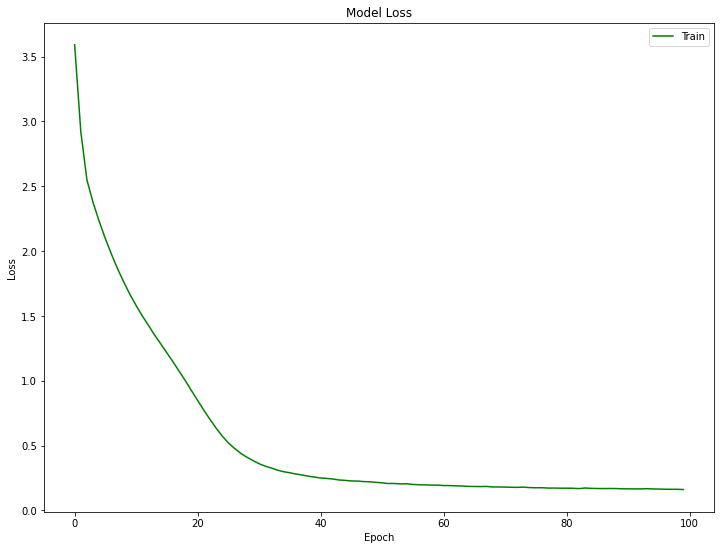

In [74]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], 'g')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

## Generate text

In [36]:
tf.train.latest_checkpoint(checkpoint_dir)

'./checkpoints_2021.05.03-18:15:29/ckpt_100'

In [75]:
# !rm -rf checkpoints_2021.05.03-18:15:29

In [38]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            18944     
_________________________________________________________________
gru_2 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
gru_3 (GRU)                  (1, None, 1024)           6297600   
_________________________________________________________________
dropout_1 (Dropout)          (1, None, 1024)           0         
_________________________________________________________________
dense_1 (Dense)              (1, None, 74)             75850     
Total params: 10,330,698
Trainable params: 10,330,698
Non-trainable params: 0
_________________________________________________________________


In [72]:
def generate_text(model, start_string):
    
    print('Generating with seed: "' + start_string + '"')
    
    num_generate = 350

    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    temperature = 0.1

    text_generated = []

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [73]:
print(generate_text(model, start_string=u"Подлинный самурай никогда не должен расслабляться и падать духом."))

Generating with seed: "Подлинный самурай никогда не должен расслабляться и падать духом."
Подлинный самурай никогда не должен расслабляться и падать духом. Но могу распоясавшегося игрока, мастер Китабатакэ отщипнул кончик фитиля единственной горящей свечи и сказал 

 Я слышал, как ваше преосвященство сказал следующее Есть две разновидности характера, внешняя и внутренняя, и тот, у кого не хватает решимости. Более того, если во время разговора ты будешь отвлекаться, может случиться, что не хватает, от


## 2. проверить насколько изменится качество генерации текста при токенизации по словам

### Prepare the text

In [132]:
word_tokens = word_tokenize(text)
word_vocab = sorted(set(word_tokens))
print ('There are {} unique words'.format(len(word_vocab)))

idx2word = np.array(word_vocab)
word2idx = {w: i for i, w in enumerate(word_vocab)}

There are 9093 unique words


In [133]:
text_as_int = np.array([word2idx[w] for w in word_tokens])

In [134]:
word_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = word_dataset.batch(seq_length+1, drop_remainder=True)
dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
    print('Input data: ', repr(' '.join(idx2word[input_example.numpy()])))
    print('Target data:', repr(' '.join(idx2word[target_example.numpy()])))

Input data:  'Цунэтомо Ямамото Хагакурэ Из Книги Первой Хотя самурай должен прежде всего чтить Путь Самурая , не вызывает сомнений , что все мы небрежительны . Поэтому , если в наши дни спросить В чем подлинный смысл Пути Самурая , лишь немногие ответят без промедления . А все потому , что никто заранее не готовит себя к ответу на такие вопросы . Это свидетельствует о том , что люди забывают о Пути . Небрежение опасно . Я постиг , что Путь Самурая это смерть . В ситуации или или без колебаний выбирай смерть . Это нетрудно . Исполнись решимости и действуй .'
Target data: 'Ямамото Хагакурэ Из Книги Первой Хотя самурай должен прежде всего чтить Путь Самурая , не вызывает сомнений , что все мы небрежительны . Поэтому , если в наши дни спросить В чем подлинный смысл Пути Самурая , лишь немногие ответят без промедления . А все потому , что никто заранее не готовит себя к ответу на такие вопросы . Это свидетельствует о том , что люди забывают о Пути . Небрежение опасно . Я постиг , что Путь С

In [135]:
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

### Build The Model

In [136]:
model = build_model(
    vocab_size = len(word_vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=batch_size)

### Run the model

In [137]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (64, None, 256)           2327808   
_________________________________________________________________
gru_14 (GRU)                 (64, None, 1024)          3938304   
_________________________________________________________________
gru_15 (GRU)                 (64, None, 1024)          6297600   
_________________________________________________________________
dropout_7 (Dropout)          (64, None, 1024)          0         
_________________________________________________________________
dense_7 (Dense)              (64, None, 9093)          9320325   
Total params: 21,884,037
Trainable params: 21,884,037
Non-trainable params: 0
_________________________________________________________________


### Configure checkpoints

In [138]:
checkpoint_dir = './checkpoints'+ datetime.datetime.now().strftime("_%Y.%m.%d-%H:%M:%S")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

## Train the model

In [139]:
optimizer = tf.keras.optimizers.Adam() 
model.compile(optimizer=optimizer, loss=loss)

In [140]:
epochs = 150 # 300

In [141]:
history_word = model.fit(dataset, epochs=epochs, callbacks=[checkpoint_callback]) 

Epoch 1/150
6/6 [==============================] - 6s 527ms/step - loss: 8.9931
Epoch 2/150
6/6 [==============================] - 3s 525ms/step - loss: 7.5158
Epoch 3/150
6/6 [==============================] - 3s 517ms/step - loss: 7.3607
Epoch 4/150
6/6 [==============================] - 3s 519ms/step - loss: 7.1964
Epoch 5/150
6/6 [==============================] - 3s 521ms/step - loss: 7.1660
Epoch 6/150
6/6 [==============================] - 3s 520ms/step - loss: 7.1315
Epoch 7/150
6/6 [==============================] - 3s 515ms/step - loss: 7.1176
Epoch 8/150
6/6 [==============================] - 3s 521ms/step - loss: 7.1312
Epoch 9/150
6/6 [==============================] - 3s 520ms/step - loss: 7.1182
Epoch 10/150
6/6 [==============================] - 3s 518ms/step - loss: 7.1276
Epoch 11/150
6/6 [==============================] - 3s 520ms/step - loss: 7.0948
Epoch 12/150
6/6 [==============================] - 3s 508ms/step - loss: 7.0935
Epoch 13/150
6/6 [===================

ResourceExhaustedError: ignored

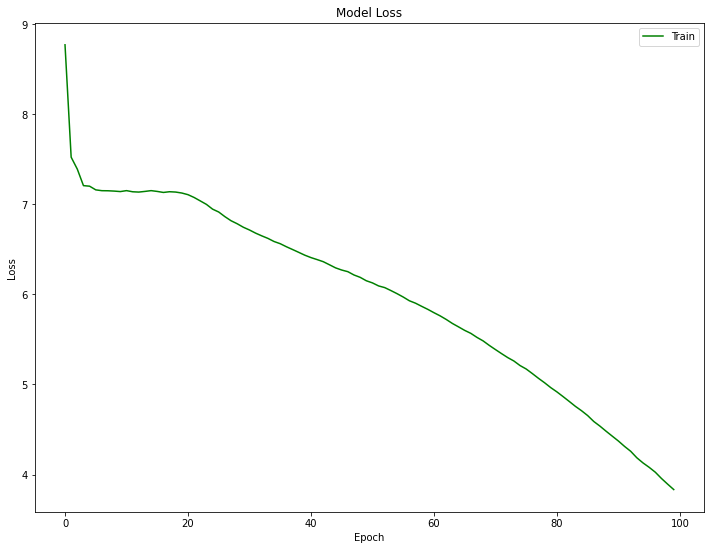

In [87]:
plt.figure(figsize=(12, 9))
plt.plot(history_word.history['loss'], 'g')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

### Generate text

In [97]:
tf.train.latest_checkpoint(checkpoint_dir)

'./checkpoints_2021.05.03-18:52:23/ckpt_100'

In [104]:
# !rm -rf checkpoints_2021.05.03-18:52:23

In [101]:
model = build_model(
    vocab_size=len(word_vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [102]:
def generate_text(model, start_string):
    
    print('Generating with seed: "' + start_string + '"')   
    
    num_generate = 350

    input_eval = [word2idx[s] for s in [start_string]]
    input_eval = tf.expand_dims(input_eval, 0)
    
    temperature = 0.1

    text_generated = []

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature

        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2word[predicted_id])

    return (start_string + ''.join(text_generated))

In [103]:
print(generate_text(model, start_string=u"Подлинный самурай никогда не должен расслабляться и падать духом."))

Generating with seed: "Подлинный самурай никогда не должен расслабляться и падать духом."


KeyError: ignored

## Additionally

### Reading data

In [ ]:
import collections

In [ ]:
def read_data(filename):
  # Extract the first file enclosed in a zip file as a list of words
    with open(filename, 'rb') as f:
        data = []
        file_string = f.read().decode(encoding='Windows-1251')
        file_string = preprocess_text(file_string)
        file_string = file_string.split(' ')
        data.extend(file_string)
    return data

In [ ]:
# words = open(path_to_file, 'rb').read().decode(encoding='Windows-1251')
words = read_data(path_to_file)

In [ ]:
print('Data size %d' % len(words))
print('Example words (start): ', words[:10])
print('Example words (end): ', words[-10:])

Data size 37842
Example words (start):  ['цунэтомо', 'ямамото', 'хагакурэ', '', '', 'из', 'книги', 'первой', 'хотя', 'самурай']
Example words (end):  ['отошел', 'от', 'жизни', 'самурая', 'и', 'стал', 'буддистским', 'монахом', '', '']


In [ ]:
vocabulary_size = 0
def build_dataset(words):
    global vocabulary_size

    count = [['UNK', -1]]
    # Gets words sorted by frequency
    count.extend(collections.Counter(words).most_common())
    dictionary = dict()

    # Create an ID for each unique word
    for word, c in count:
        if c<10:
            continue
        dictionary[word] = len(dictionary)
        vocabulary_size += 1
    
    data = list()
    unk_count = 0
  
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  
            unk_count = unk_count + 1
        data.append(index)
    
    count[0][1] = unk_count
  
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
    
    return data, count, dictionary, reverse_dictionary

In [ ]:
data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:25])
print('Sample data', data[:10])
print('Vocabulary size: ', vocabulary_size)

Most common words (+UNK) [['UNK', 15142], ('', 3974), ('и', 1044), ('в', 1011), ('не', 686), ('что', 533), ('он', 454), ('на', 371), ('если', 346), ('его', 308), ('с', 294), ('когда', 280), ('это', 250), ('к', 248), ('человек', 225), ('но', 214), ('я', 209), ('ты', 209), ('о', 195), ('был', 162), ('из', 160), ('как', 148), ('то', 141), ('все', 129), ('у', 124)]
Sample data [166, 149, 0, 0, 0, 19, 245, 0, 98, 130]
Vocabulary size:  402


### Execute the training

### Generating data

In [ ]:
data_index = 0

def generate_batch(batch_size, window_size):
    global data_index 
    
    # two numpy arras to hold target words (batch)
    # and context words (labels)
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    
    # span defines the total window size
    span = 2 * window_size + 1 
    
    # The buffer holds the data contained within the span
    queue = collections.deque(maxlen=span)
  
    # Fill the buffer and update the data_index
    for _ in range(span):
        queue.append(data[data_index])
        data_index = (data_index + 1) % len(data)
  

    for i in range(batch_size // (2*window_size)):
        k=0
        # Avoid the target word itself as a prediction
        for j in list(range(window_size))+list(range(window_size+1, 2*window_size+1)):
            batch[i * (2*window_size) + k] = queue[window_size]
            labels[i * (2*window_size) + k, 0] = queue[j]
            k += 1 
    
        # Everytime we read num_samples data points, update the queue
        queue.append(data[data_index])
    
        # If end is reached, circle back to the beginning
        data_index = (data_index + np.random.randint(window_size)) % len(data)
    
    return batch, labels

In [ ]:
print('data:', [reverse_dictionary[di] for di in data[:8]])

data_index = 0
batch, labels = generate_batch(batch_size=8, window_size=2)
print('\nwith window_size = %d:' %2)
print('    batch:', [reverse_dictionary[bi] for bi in batch])
print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: ['цунэтомо', 'ямамото', '', '', '', 'из', 'книги', '']

with window_size = 2:
    batch: ['', '', '', '', '', '', '', '']
    labels: ['цунэтомо', 'ямамото', '', '', 'ямамото', '', '', 'из']


### Defining the model

In [ ]:
batch_size = 64 
embedding_size = 256 
window_size = 4 

num_sampled = 32 # Number of negative examples to sample.

In [ ]:
import math
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.reset_default_graph()

# Training input data (target word IDs).
train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
# Training input label data (context word IDs)
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

################################################
#            Model variables                   #
################################################

# Embedding layer
embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))

# Neural network weights and biases
softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=0.1 / math.sqrt(embedding_size))
)
softmax_biases = tf.Variable(tf.random_uniform([vocabulary_size],-0.01,0.01))

# Look up embeddings for a batch of inputs.
embed = tf.nn.embedding_lookup(embeddings, train_dataset)
#embed = tf.nn.dropout(embed, keep_prob=0.8)
################################################
#            Computes loss                     #
################################################
loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(
        weights=softmax_weights, biases=softmax_biases, inputs=embed,
        labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size)
)

################################################
#            Optimization                      #
################################################
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

################################################
#            For evaluation                    #
################################################
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
normalized_embeddings = embeddings / norm

Instructions for updating:
non-resource variables are not supported in the long term


### Running skip-gram

In [ ]:
num_steps = 250001

session = tf.InteractiveSession()

# Initialize the variables in the graph
tf.global_variables_initializer().run()
print('Initialized')
average_loss = 0

for step in range(num_steps):

    # Generate a single batch of data
    batch_data, batch_labels = generate_batch(
        batch_size, window_size)

    # Optimize the embedding layer and neural network
    # compute loss
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)

    # Update the average loss variable
    average_loss += l

    if (step+1) % 5000 == 0:
        if step > 0:
            average_loss = average_loss / 5000

        print('Average loss at step %d: %f' % (step+1, average_loss))
        average_loss = 0

sg_embeddings = normalized_embeddings.eval()
session.close()

Initialized
Average loss at step 5000: 2.694906
Average loss at step 10000: 2.371401
Average loss at step 15000: 2.339168
Average loss at step 20000: 2.330890
Average loss at step 25000: 2.338608
Average loss at step 30000: 2.325357
Average loss at step 35000: 2.314319
Average loss at step 40000: 2.300018
Average loss at step 45000: 2.300777
Average loss at step 50000: 2.325264
Average loss at step 55000: 2.298832
Average loss at step 60000: 2.288602
Average loss at step 65000: 2.274108
Average loss at step 70000: 2.308844
Average loss at step 75000: 2.287721
Average loss at step 80000: 2.276296
Average loss at step 85000: 2.267713
Average loss at step 90000: 2.280748
Average loss at step 95000: 2.296114
Average loss at step 100000: 2.279712
Average loss at step 105000: 2.280656
Average loss at step 110000: 2.258889
Average loss at step 115000: 2.288157
Average loss at step 120000: 2.273157
Average loss at step 125000: 2.271507
Average loss at step 130000: 2.262811
Average loss at step

### Visualizing word vectors

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)

# get the T-SNE manifold
two_d_embeddings = tsne.fit_transform(sg_embeddings)

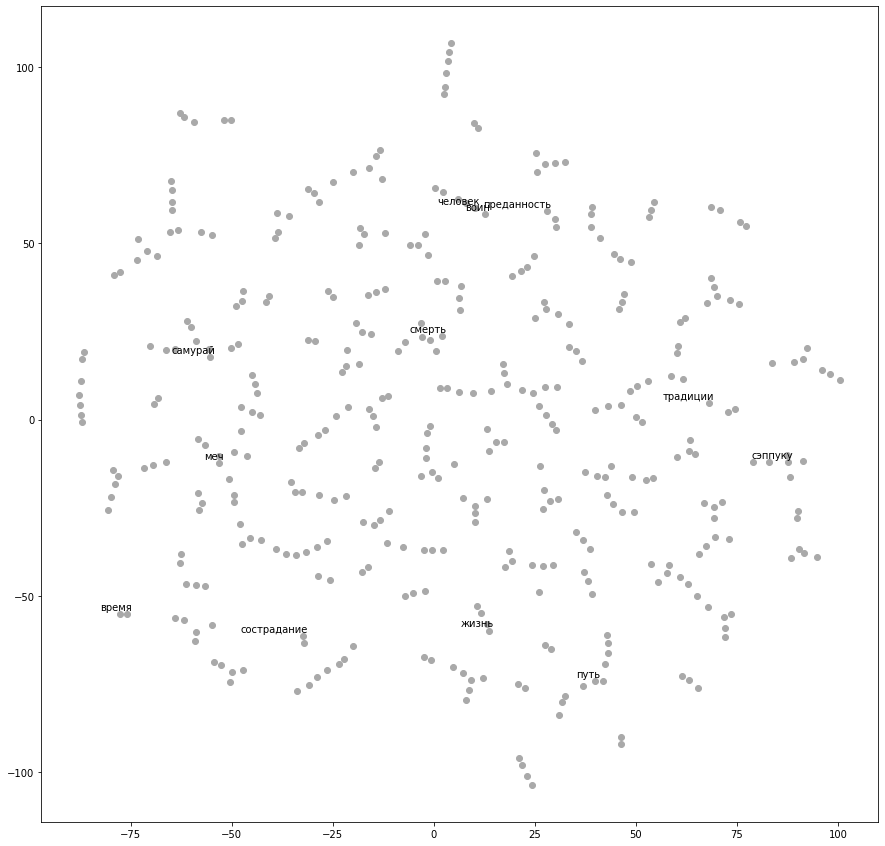

In [ ]:
from matplotlib import pylab

selected_words = ['воин', 'путь', 'самурай', 'хагакурэ', 'традиции', 'человек', 'победа', 'меч', 'жизнь', 'время', 'смерть', 'сэппуку', 'преданность', 'сострадание']

words = [reverse_dictionary[i] for i in np.arange(vocabulary_size)]

pylab.figure(figsize=(15, 15))
# plot all the embeddings and their corresponding words
for i, label in enumerate(words):
    x, y = two_d_embeddings[i,:]
    pylab.scatter(x, y, c='darkgray')   
    if label in selected_words:
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom',fontsize=10)
        
pylab.show()